In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.dpi']=300

In [2]:
#Load Dataset 

df = pd.read_csv(r"D:\ExcelR\Data Science\Assignments\Association Rule\book.csv")
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

### Association Rules with Different Support and Confidence Values

In [5]:
support_values = [0.1, 0.15, 0.2]
confidence_values = [0.6, 0.7, 0.8]

for support in support_values:
    for confidence in confidence_values:
        frequent_itemsets = apriori(df, min_support=support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        print(f"Support={support}, Confidence={confidence}")
        print(rules)

Support=0.1, Confidence=0.6
             antecedents consequents  antecedent support  consequent support  \
0             (YouthBks)  (ChildBks)              0.2475               0.423   
1             (ChildBks)   (CookBks)              0.4230               0.431   
2             (DoItYBks)  (ChildBks)              0.2820               0.423   
3               (RefBks)  (ChildBks)              0.2145               0.423   
4               (ArtBks)  (ChildBks)              0.2410               0.423   
5              (GeogBks)  (ChildBks)              0.2760               0.423   
6             (YouthBks)   (CookBks)              0.2475               0.431   
7             (DoItYBks)   (CookBks)              0.2820               0.431   
8               (RefBks)   (CookBks)              0.2145               0.431   
9               (ArtBks)   (CookBks)              0.2410               0.431   
10             (GeogBks)   (CookBks)              0.2760               0.431   
11          

### Minimum Length in Apriori Algorithm

In [6]:
min_length = 2

frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
filtered_rules = rules[rules['antecedents'].apply(lambda x: len(x)) >= min_length]

print(f"Rules with Minimum Length {min_length}:")
print(filtered_rules)

Rules with Minimum Length 2:
             antecedents consequents  antecedent support  consequent support  \
4    (YouthBks, CookBks)  (ChildBks)              0.1620               0.423   
5   (YouthBks, ChildBks)   (CookBks)              0.1650               0.431   
6    (DoItYBks, CookBks)  (ChildBks)              0.1875               0.423   
7   (DoItYBks, ChildBks)   (CookBks)              0.1840               0.431   
8      (RefBks, CookBks)  (ChildBks)              0.1525               0.423   
9     (RefBks, ChildBks)   (CookBks)              0.1515               0.431   
10     (ArtBks, CookBks)  (ChildBks)              0.1670               0.423   
11    (ChildBks, ArtBks)   (CookBks)              0.1625               0.431   
12    (GeogBks, CookBks)  (ChildBks)              0.1925               0.423   
13   (ChildBks, GeogBks)   (CookBks)              0.1950               0.431   
14   (DoItYBks, GeogBks)  (ChildBks)              0.1325               0.423   
15     (Geo

### Visualize Obtained Rules

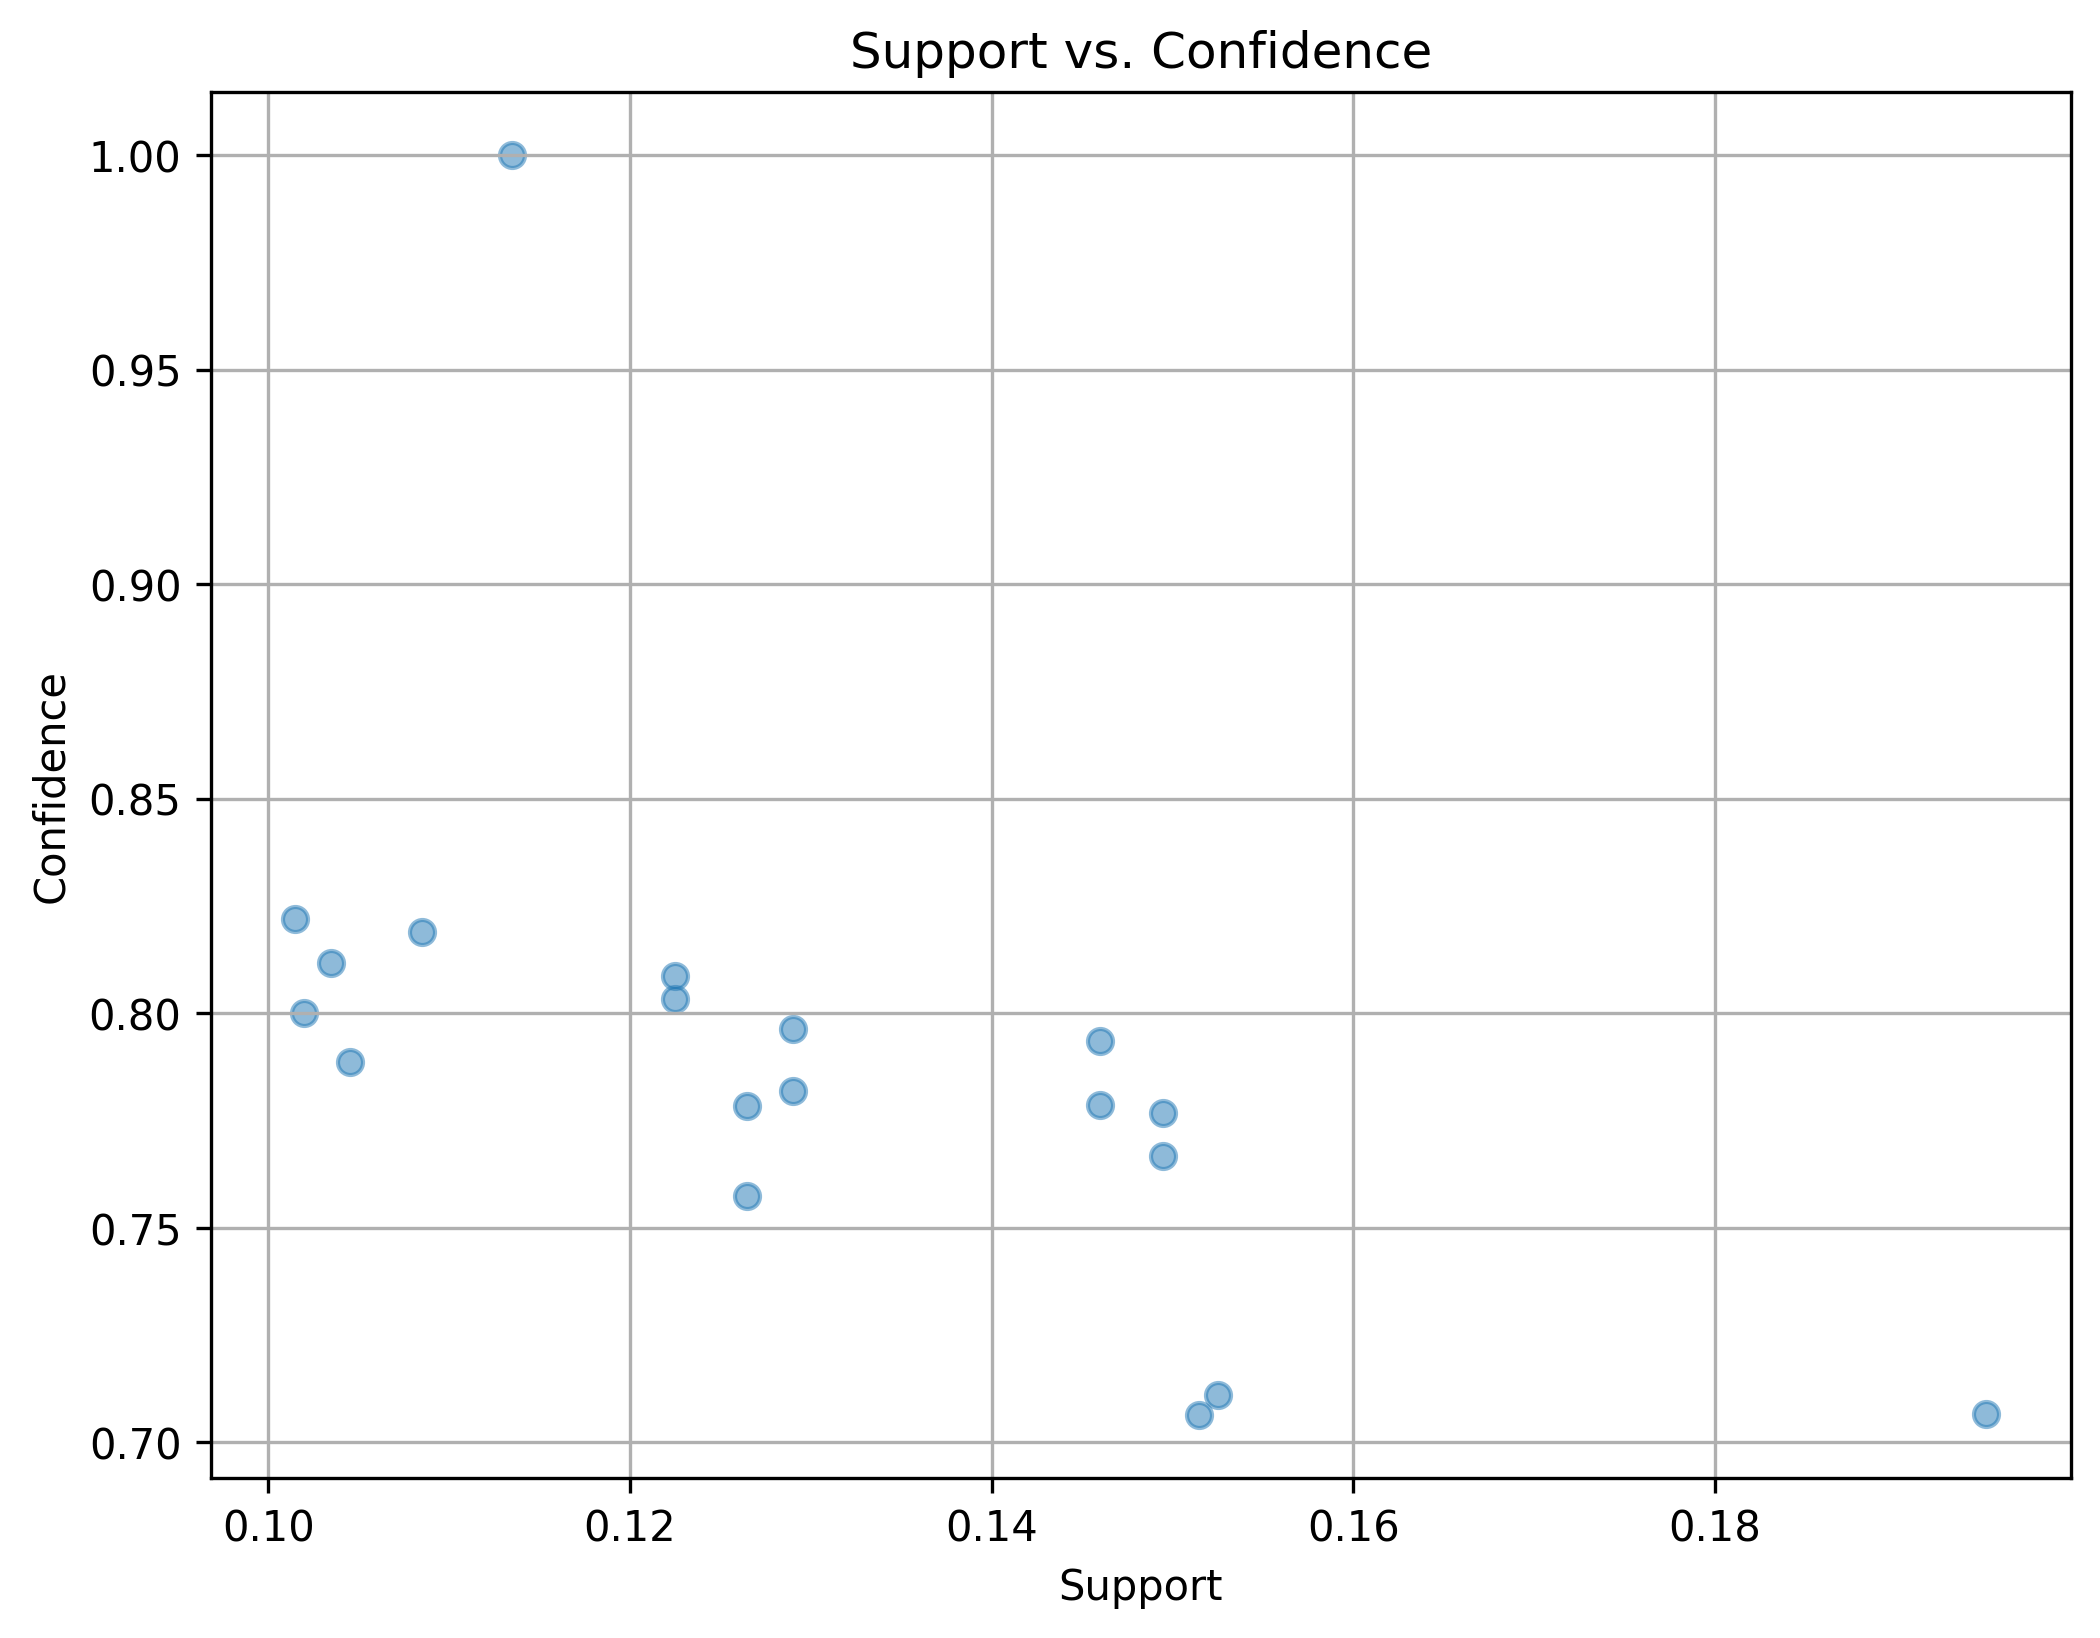

In [7]:
# Scatter plot of support vs. confidence

plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.grid(True)

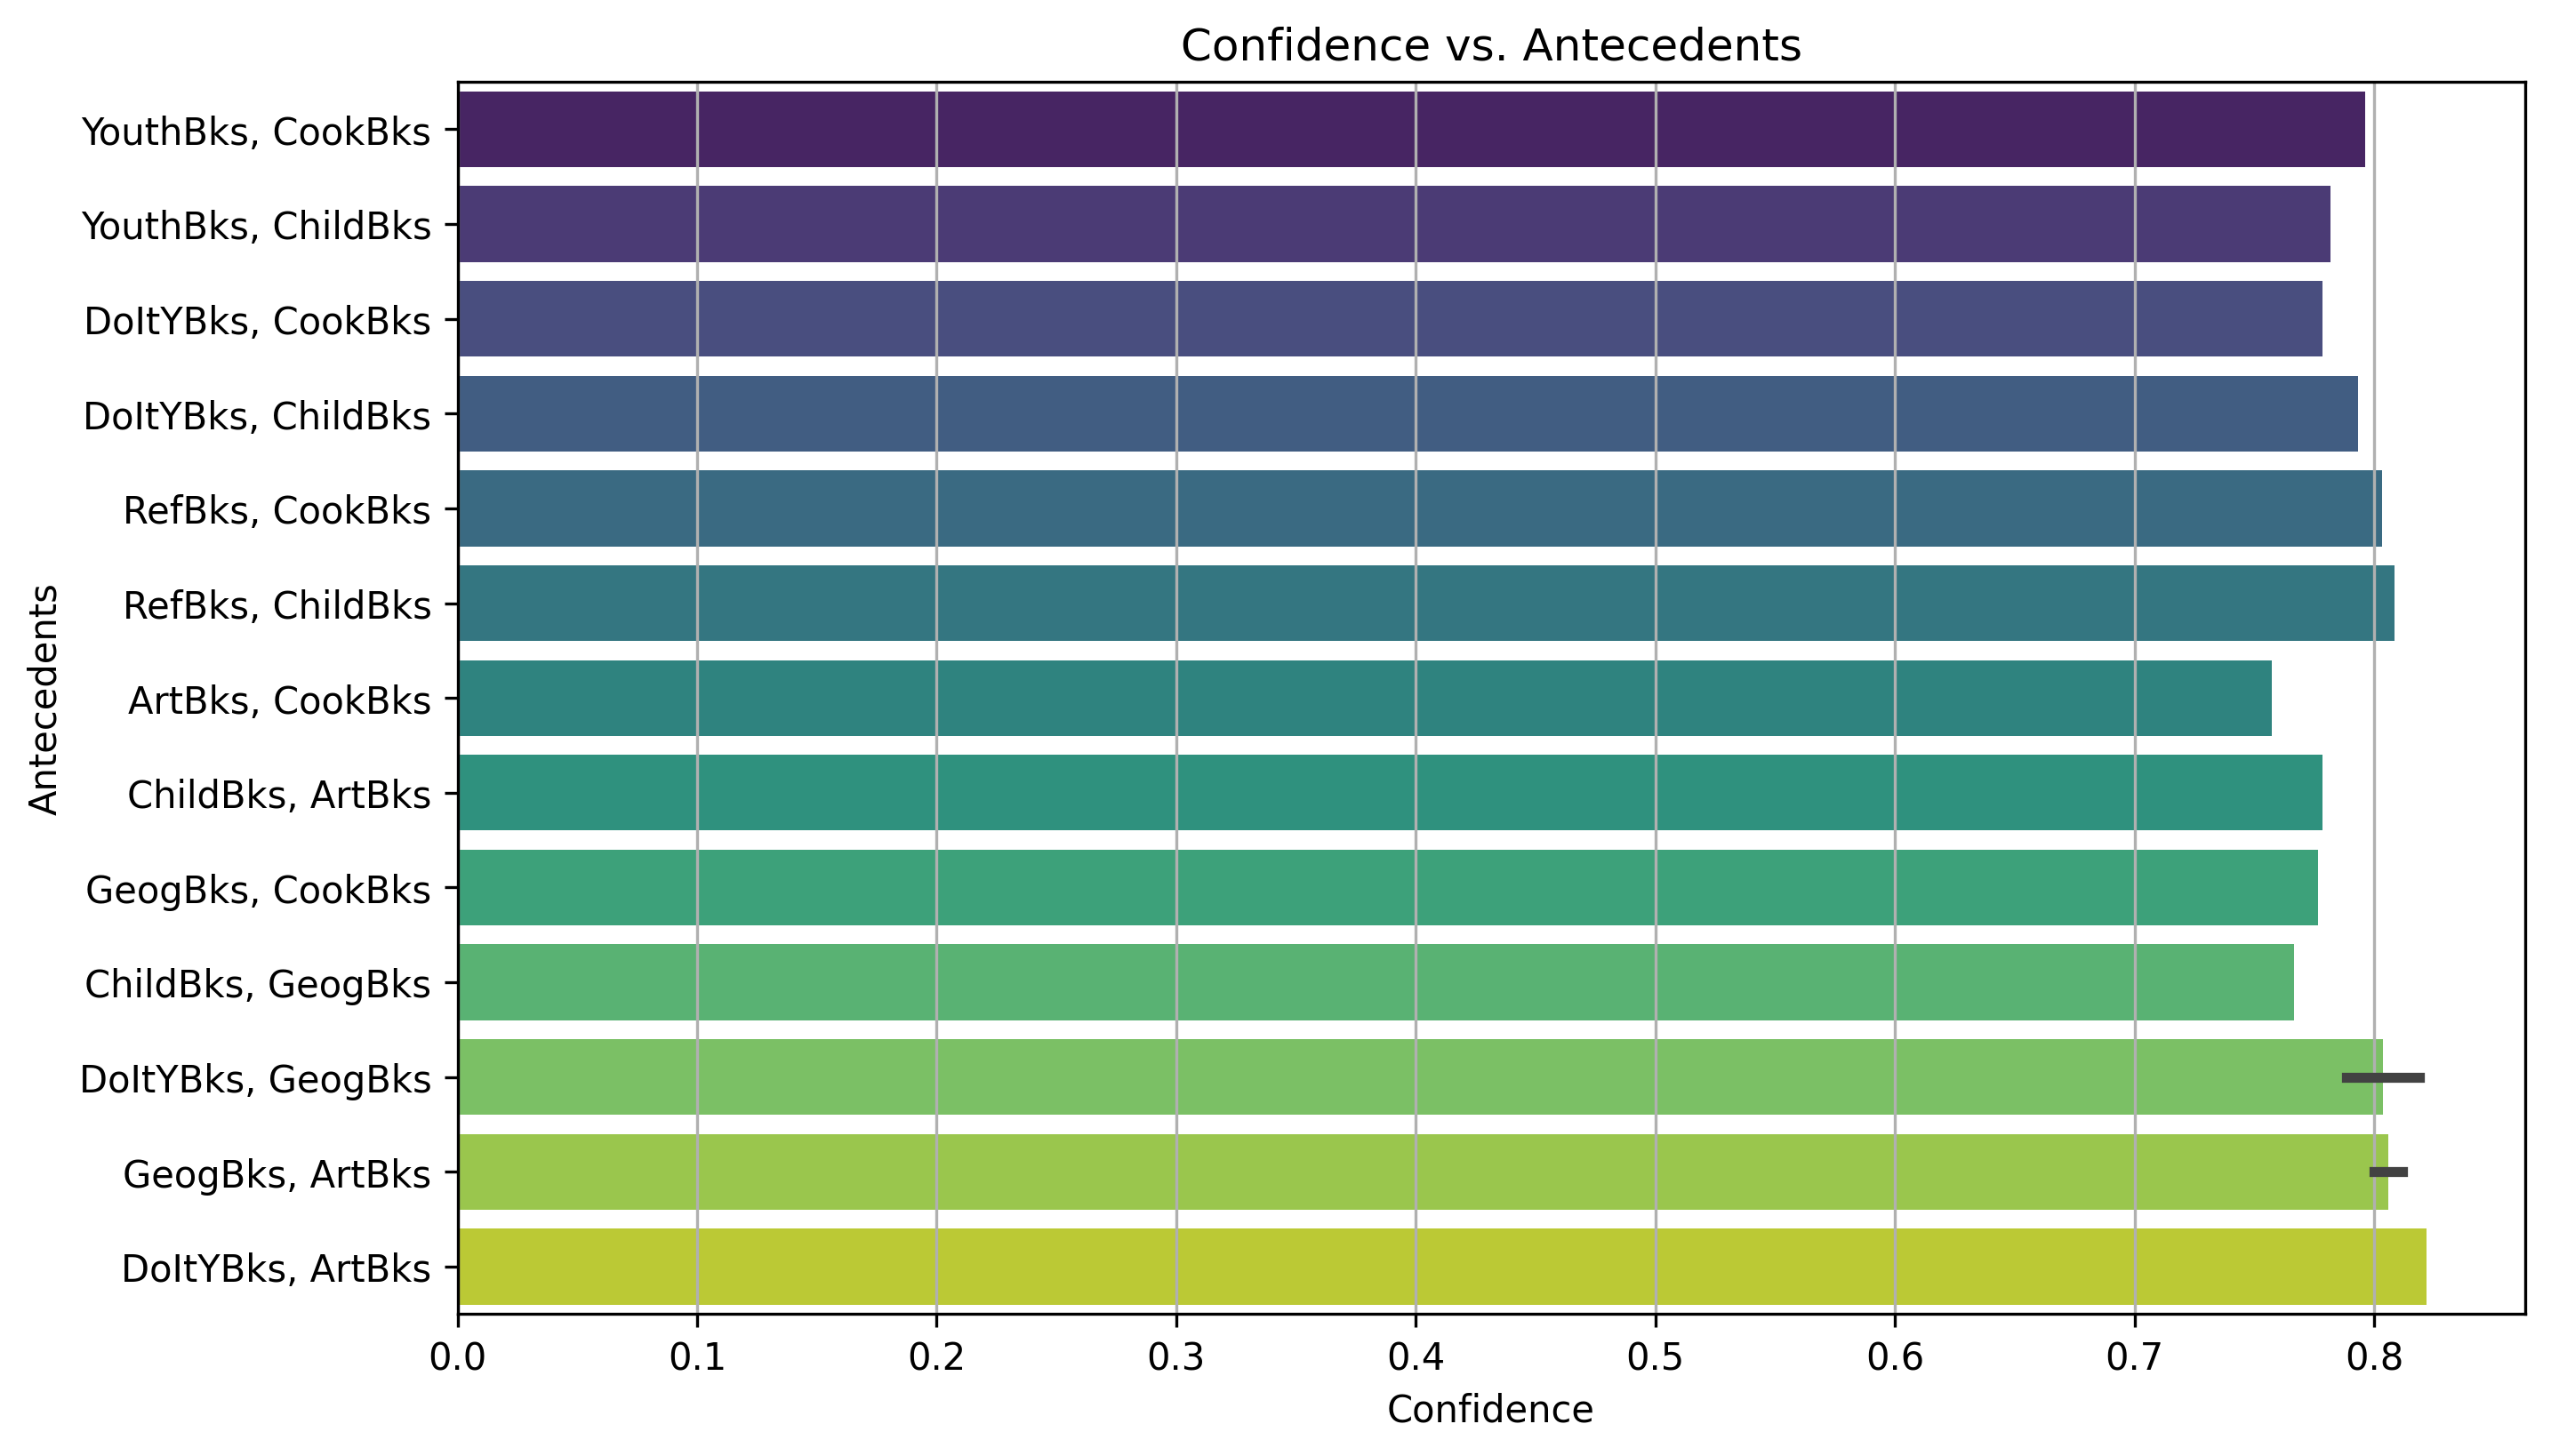

In [8]:
# Bar chart of antecedents and consequents

antecedents = []
consequents = []

for antecedent, consequent in zip(filtered_rules['antecedents'], filtered_rules['consequents']):
    antecedents.append(', '.join(list(antecedent)))
    consequents.append(', '.join(list(consequent)))

plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_rules['confidence'], y=antecedents, orient='h', palette='viridis')
plt.xlabel('Confidence')
plt.ylabel('Antecedents')
plt.title('Confidence vs. Antecedents')
plt.grid(axis='x')

In [9]:
# Heatmap of support for antecedents and consequents

# New DataFrame with 'antecedents' as rows and 'consequents' as columns

support_matrix = pd.DataFrame(index=antecedents, columns=consequents)

In [10]:
for antecedent, consequent, support in zip(antecedents, consequents, filtered_rules['support']):
    support_matrix.loc[antecedent, consequent] = support

Text(0.5, 1.0, 'Support Heatmap for Antecedents and Consequents')

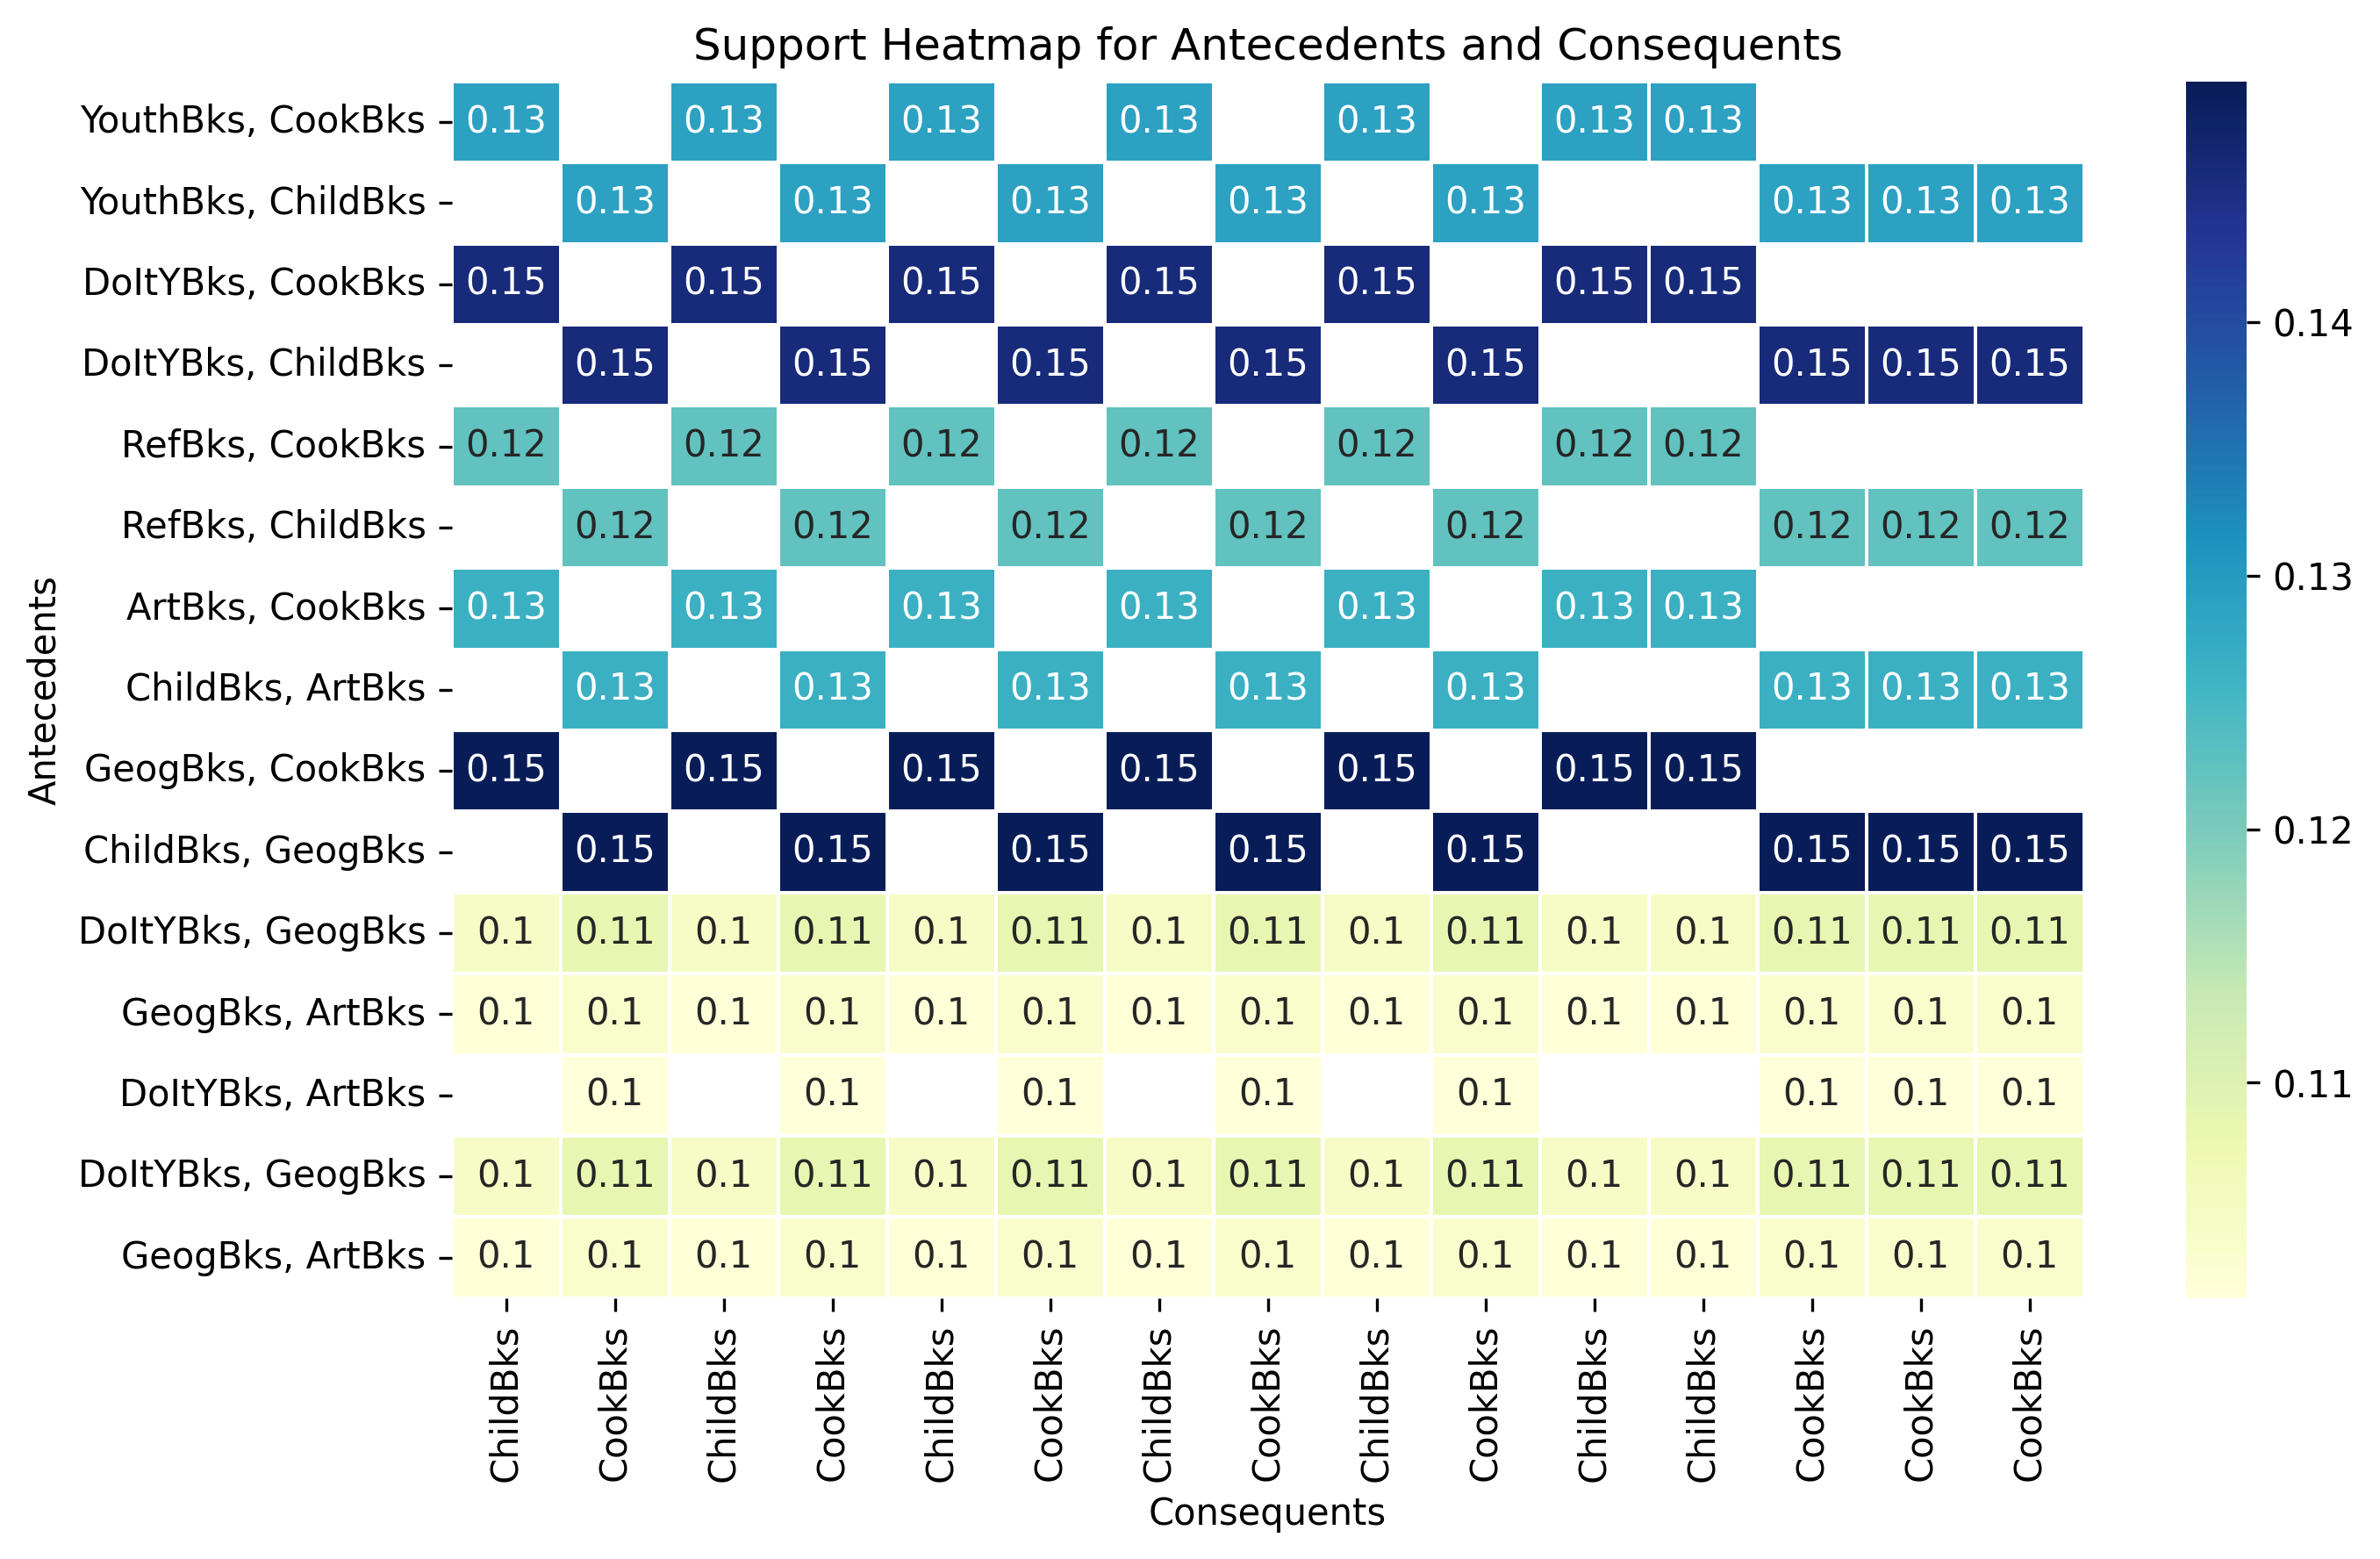

In [11]:
# Convert support values to numeric

support_matrix = support_matrix.apply(pd.to_numeric)

plt.figure(figsize=(10, 6))
sns.heatmap(support_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.title('Support Heatmap for Antecedents and Consequents')

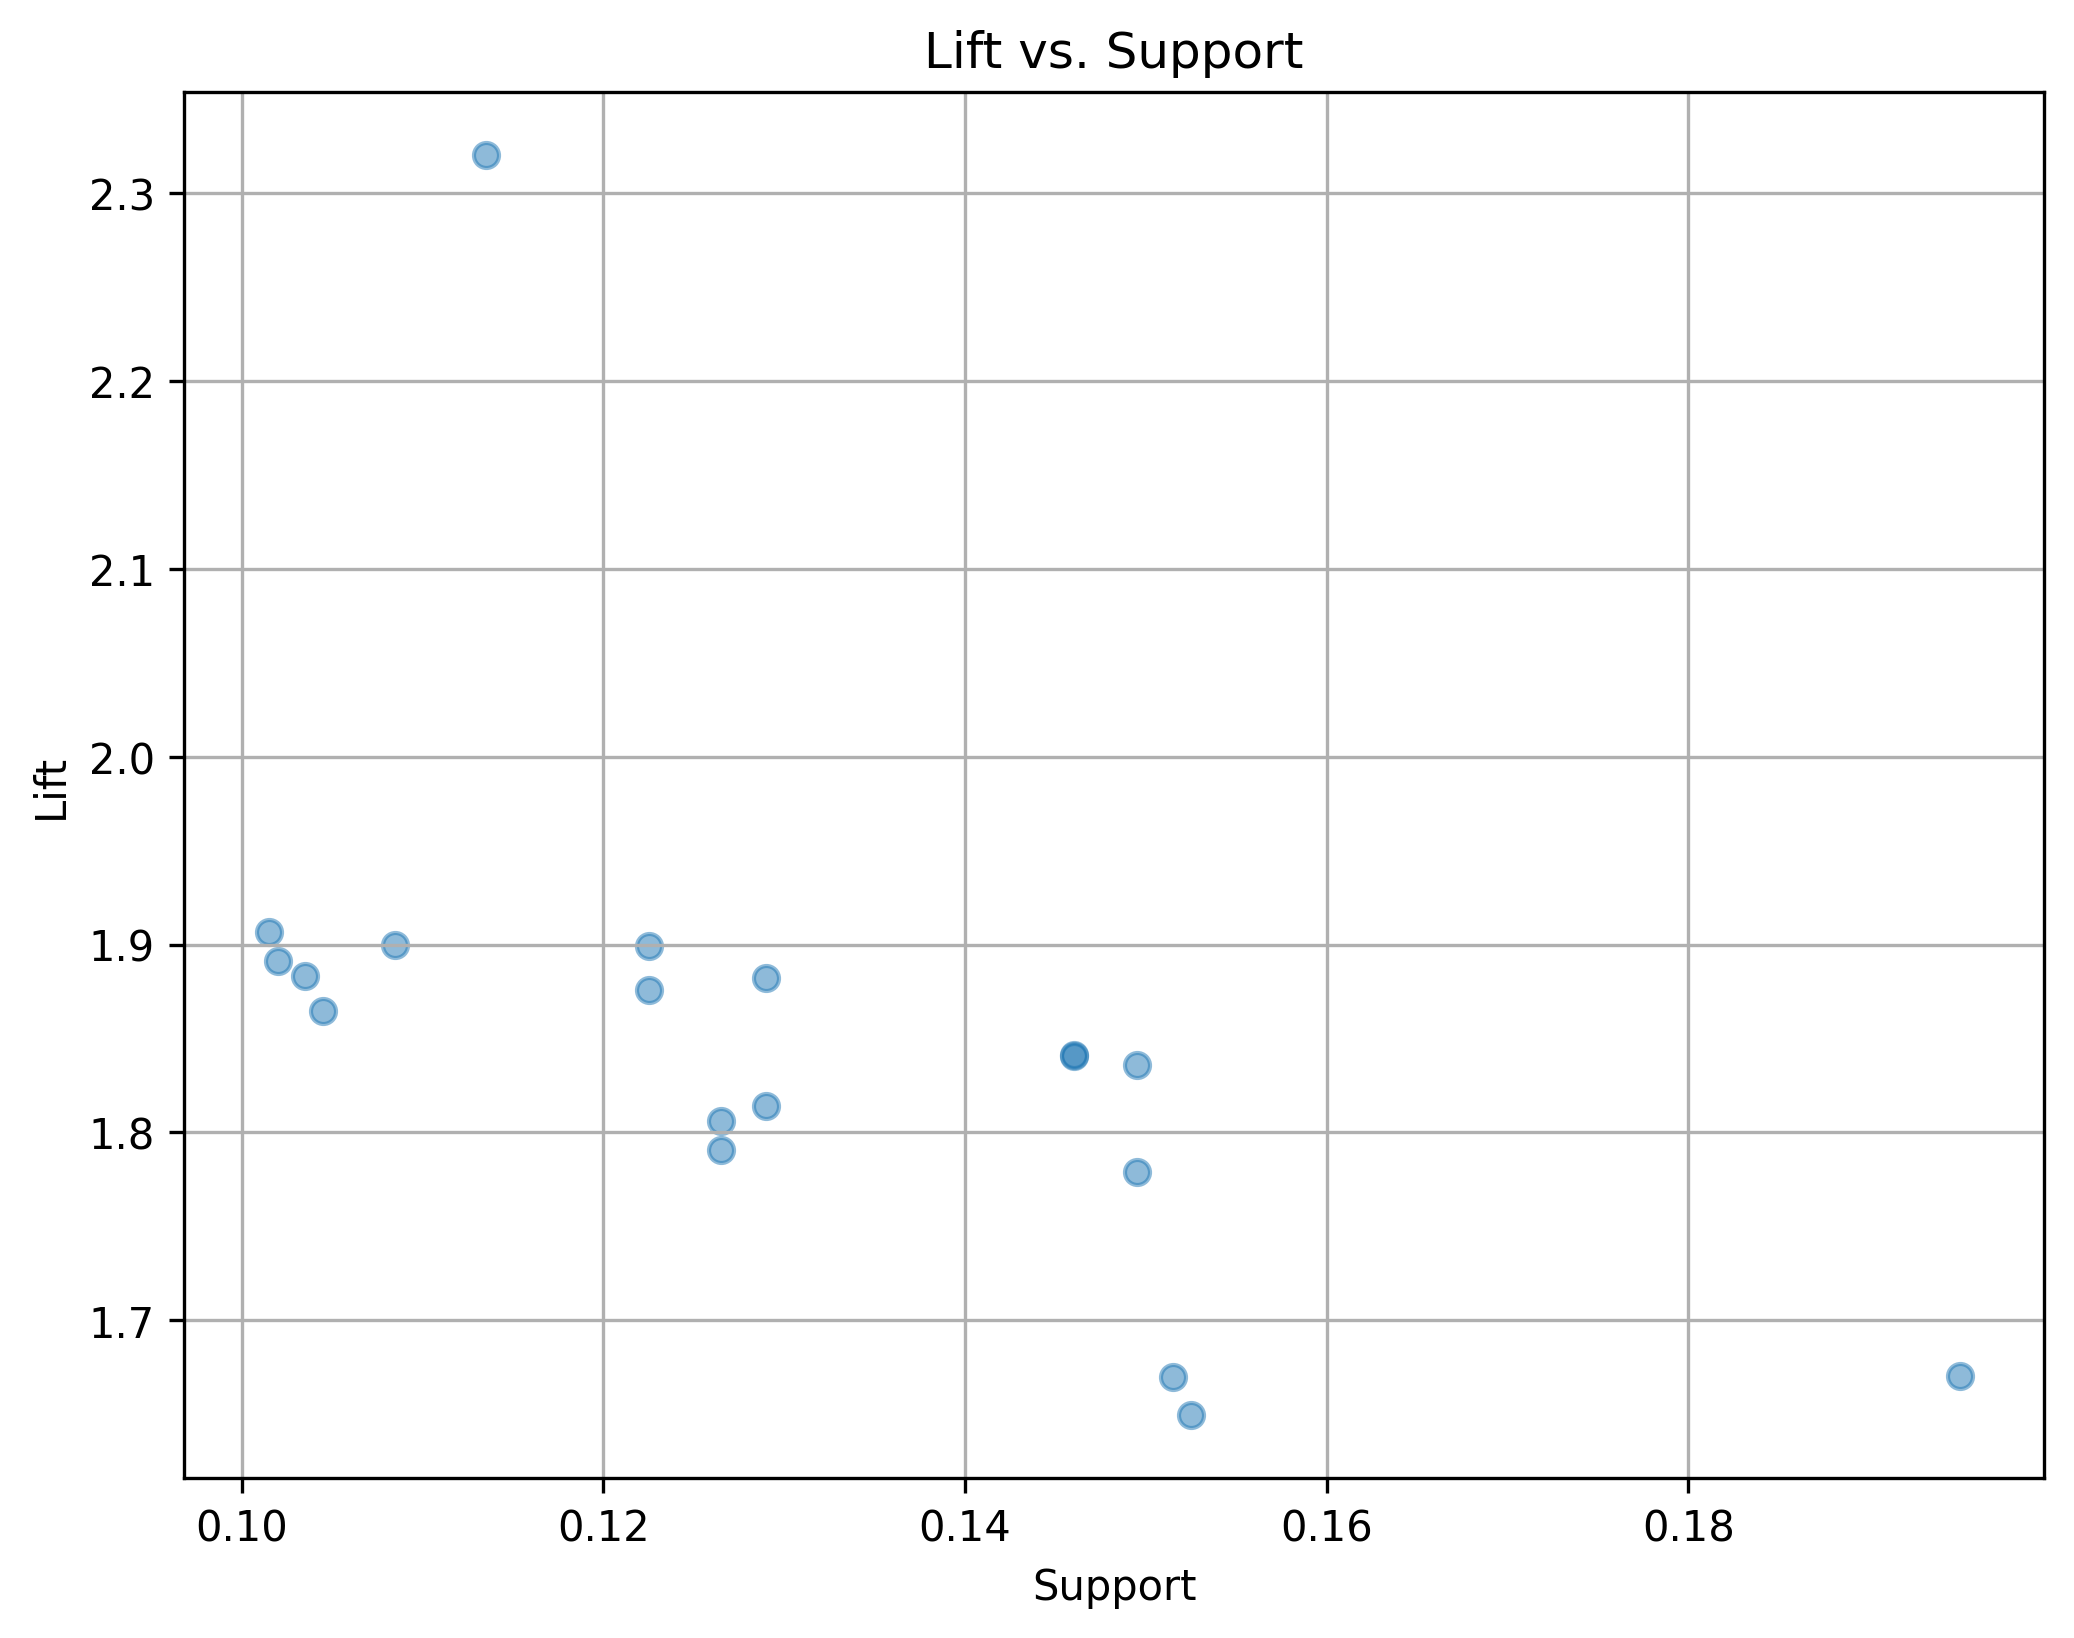

In [12]:
#  Lift vs. Support Plot

plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Lift vs. Support')
plt.grid(True)

Text(0.5, 1.0, 'Confidence vs. Support Histogram')

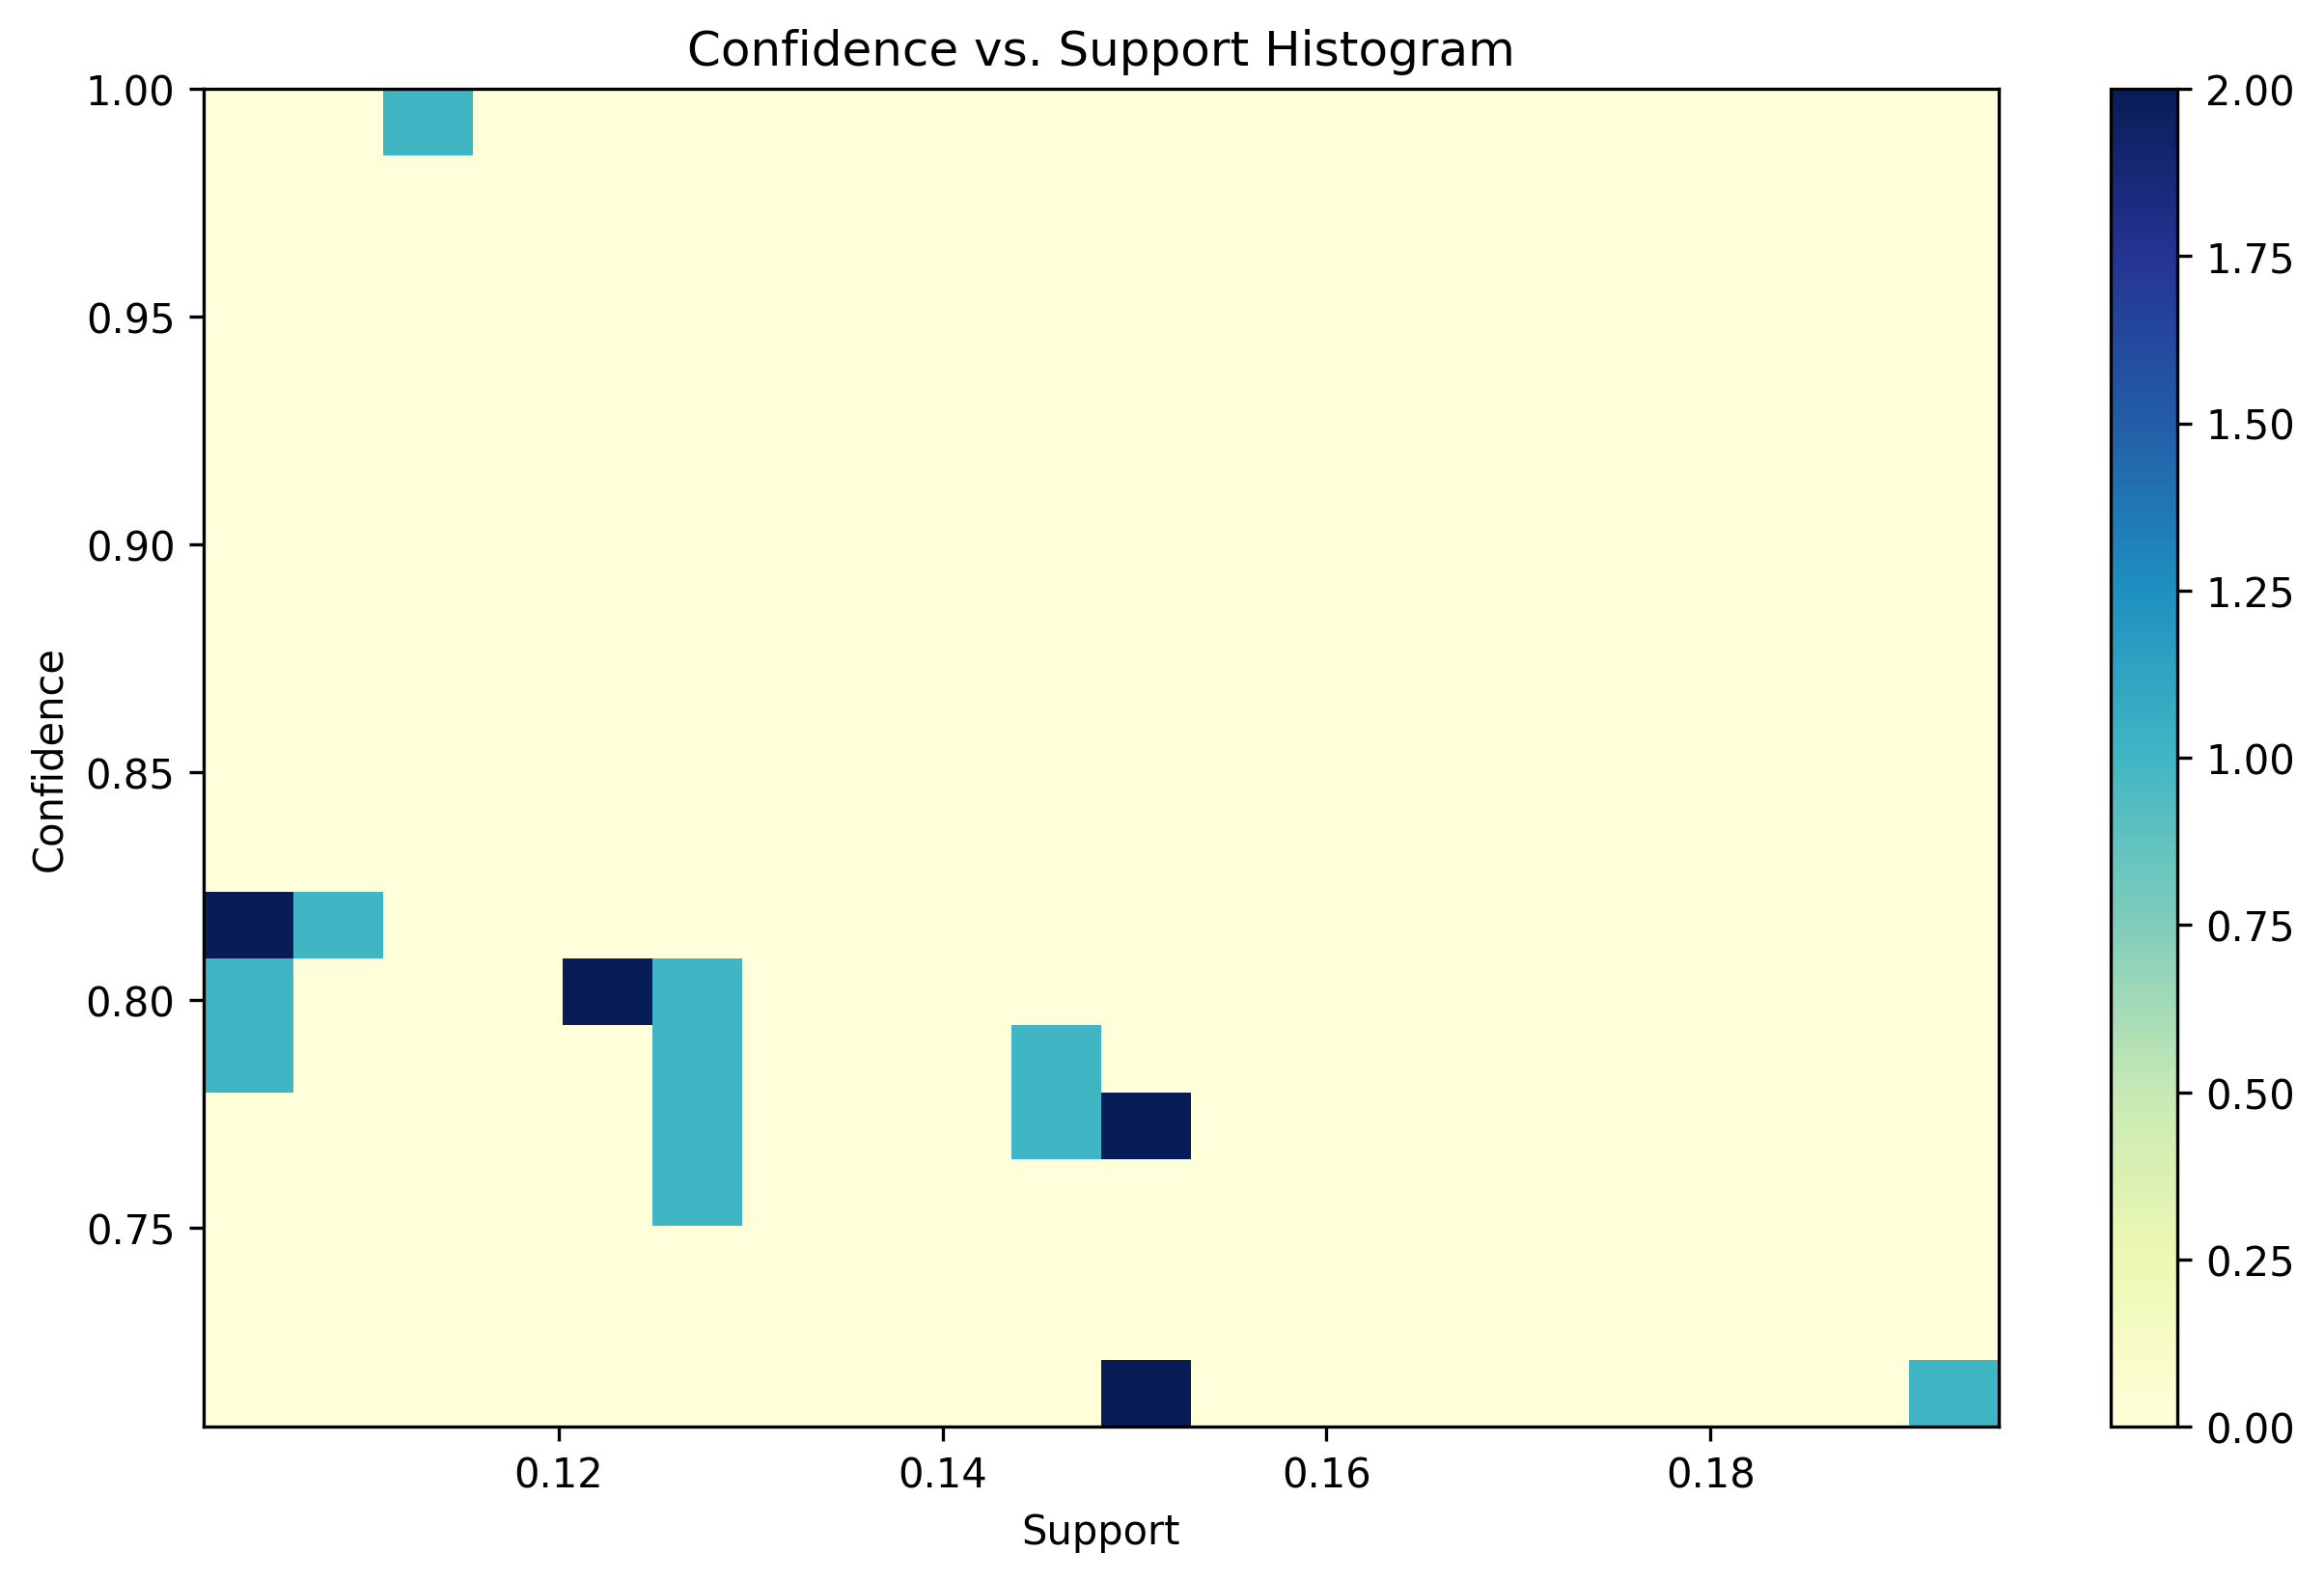

In [13]:
# Confidence vs. Support Histogram

plt.figure(figsize=(10, 6))
plt.hist2d(rules['support'], rules['confidence'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Confidence vs. Support Histogram')